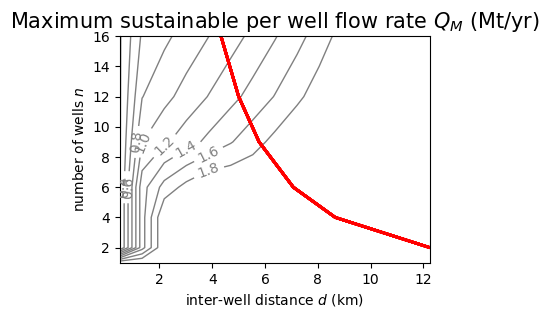

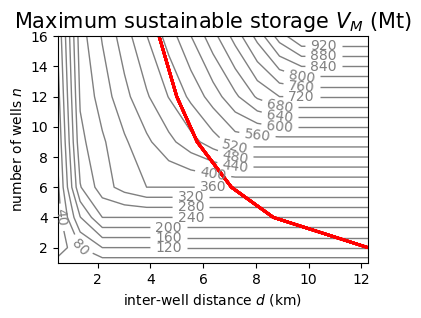

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 10 09:36:53 2022

@author: simmonds

This tool provides an estimate of the CO2 storage capacity of a geological reservoir under different scenarios of well number and distance.
Wells are placed into a grid configuration with equal numbers of rows and columns, or with a number of rows and columns that differ by 1.

Please read the file README and the attached User Guide for instructions.
This software is unlicensed and free. It is a direct language conversion of the original CO2BLOCK written in MATLAB by Silvia De Simone
and Samuel Krevor.
Please cite CO2BLOCK as:
 https://github.com/co2block/CO2BLOCK
 De Simone and Krevor (2021).  A tool for first order estimates and optimisation of dynamic storage resource capacity in saline aquifers”. International Journal of Greenhouse Gas Control, 106, 103258.

"""


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


####### INPUT DATA ###################################

# read in data file from Excel
fname = pd.read_excel('example_data.xlsx')   #name of input data file, no directory required if saved in the same location as the python functions
data = pd.DataFrame(fname)

# setting parameters
correction = 'off'
dist_min = 0.5
dist_max = 'auto'
nr_dist = 15
nr_well_max = 20
rw = 0.156
time_yr = 30
maxQ = 2


###### END OF INPUT DATA ##############################

# calculate
from calculate import calculate

d_list,well_list,d_max,Q_M_each,V_M,Table_Q,Table_V = calculate(data,correction,dist_min,dist_max,nr_dist,nr_well_max,rw,time_yr,maxQ)


###### PLOTS ###########################################

# sustainable flow rate per well
fig, ax1 = plt.subplots(figsize=(4,3),dpi=100)
Qcontour = ax1.contour(d_list,well_list,np.real(Q_M_each),10,colors='grey',linewidths=1)
ax1.clabel(Qcontour,fmt="%.1f")
ax1.set_title('Maximum sustainable per well flow rate $Q_{M}$ (Mt/yr)',fontsize=15)

plt.plot(d_max,well_list,linewidth=2, color='red')
ax1.set_xlim([min(d_list),max(d_list)])
ax1.set_xlabel('inter-well distance $d$ (km)',fontsize=10)
ax1.set_ylabel('number of wells $n$',fontsize=10)


plt.show()


# sustainable storage capacity
fig, ax2 = plt.subplots(figsize=(4,3),dpi=100)
Vcontour = ax2.contour(d_list,well_list,np.real(V_M),24,colors='grey',linewidths=1)
ax2.clabel(Vcontour,fmt="%.0f")
ax2.set_title('Maximum sustainable storage $V_{M}$ (Mt)',fontsize=15)

plt.plot(d_max,well_list,linewidth=2, color='red')
ax2.set_xlim([min(d_list),max(d_list)])
ax2.set_xlabel('inter-well distance $d$ (km)',fontsize=10)
ax2.set_ylabel('number of wells $n$',fontsize=10)


plt.show()

###########################################################
